 # 1. Importing Modules and Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math


In [2]:
data=pd.read_csv("C:\\Users\\STAR TOP\\.vscode\\Codveda_intership\\Level 3 _Task 1 Time Series Analysis\\TSLA Stock Price Data.csv")
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


# Prerprocessing Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       639 non-null    object 
 1   High       639 non-null    float64
 2   Low        639 non-null    float64
 3   Open       639 non-null    float64
 4   Close      639 non-null    float64
 5   Volume     639 non-null    float64
 6   Adj Close  639 non-null    float64
dtypes: float64(6), object(1)
memory usage: 35.1+ KB


We Need Change DataType For Date Column From Object to DataTime

In [4]:
data["Date"] = pd.to_datetime(data["Date"])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       639 non-null    datetime64[ns]
 1   High       639 non-null    float64       
 2   Low        639 non-null    float64       
 3   Open       639 non-null    float64       
 4   Close      639 non-null    float64       
 5   Volume     639 non-null    float64       
 6   Adj Close  639 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 35.1 KB


In [6]:
data.shape

(639, 7)

In [7]:
data.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

Set Date Column as Index for Time Series

In [8]:
data.set_index("Date",inplace=True)

In [9]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,639.000000,639.000000,639.000000,639.000000,6.390000e+02,639.000000
mean,543.362885,517.883537,531.004088,531.298030,4.819130e+07,531.298030
std,340.837426,325.395864,333.534448,333.362040,3.579030e+07,333.362040
min,46.896000,44.855999,45.959999,46.285999,9.800600e+06,46.285999
25%,170.258003,162.379997,167.349998,164.783005,2.392195e+07,164.783005
50%,620.409973,595.500000,603.880005,605.130005,3.448900e+07,605.130005
75%,796.584991,767.744995,779.445007,781.304993,6.329725e+07,781.304993
max,1243.489990,1217.000000,1234.410034,1229.910034,3.046940e+08,1229.910034


In [10]:
data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

### We Can See We not Have Any Missing Value in Data

In [11]:
data.duplicated().sum()

0

### We not Heve any Duplicated Value in Data

## Exploratory Time Series Analysis of Adj Close

<Axes: >

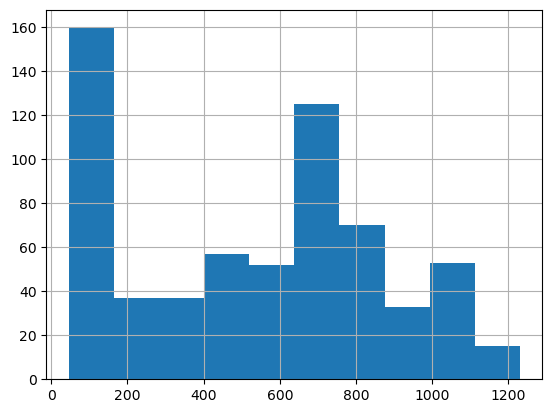

In [12]:
data["Adj Close"].hist()

Most prices were low (close to 0–200) for a long period of time, which is why the first column is so high.

In other periods, prices rose to levels (600–800) and another peak appeared there.

This could be evidence that the stock went through different phases (periods of very low prices followed by highs).

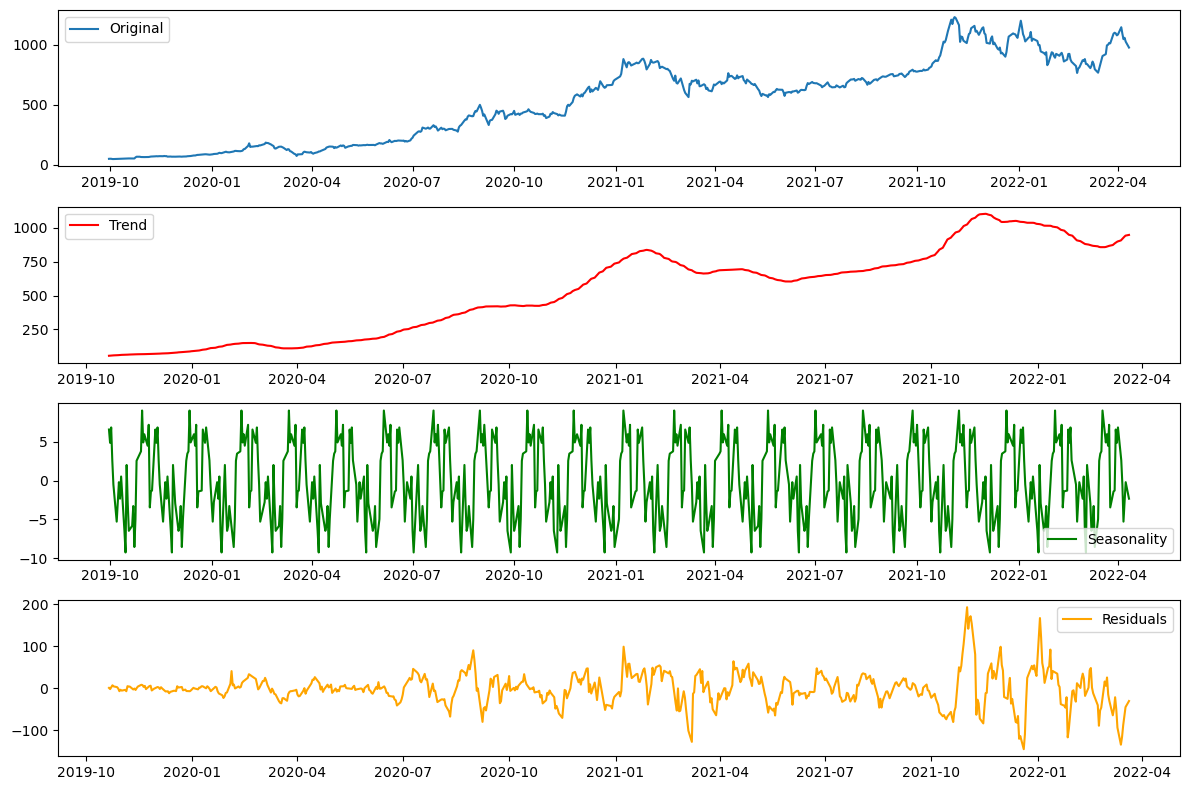

In [13]:


ts_column = data["Adj Close"]

# decomposition
decomposition = seasonal_decompose(ts_column, model="additive", period=30)  
plt.figure(figsize=(12,8))

plt.subplot(411)
plt.plot(ts_column, label="Original")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(decomposition.trend, label="Trend", color="red")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonality", color="green")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(decomposition.resid, label="Residuals", color="orange")
plt.legend(loc="best")

plt.tight_layout()
plt.show()




WE Can SEE :

**Original Series: Prices started at low levels and gradually increased over time until they reached very high levels. This indicates that the stock experienced periods of strong growth, sometimes with sharp fluctuations.

**Trend: The general trend is clearly upward, meaning that the stock's market value has been increasing over the long term, but during some periods, it slowed down or declined relatively.

**Seasonality: There is a clear recurring pattern in prices (periodic rises and falls), indicating that price movement is not completely random, but is influenced by cyclical or seasonal factors (such as quarterly results or recurring economic events).

**Residuals: Although the general trend and seasonality explain most of the movement, there are still periods where sudden changes (strong peaks or troughs) remain unexplained. This is often the result of unexpected external events such as market news or economic crises.

## Moving average and Exponential smoothing

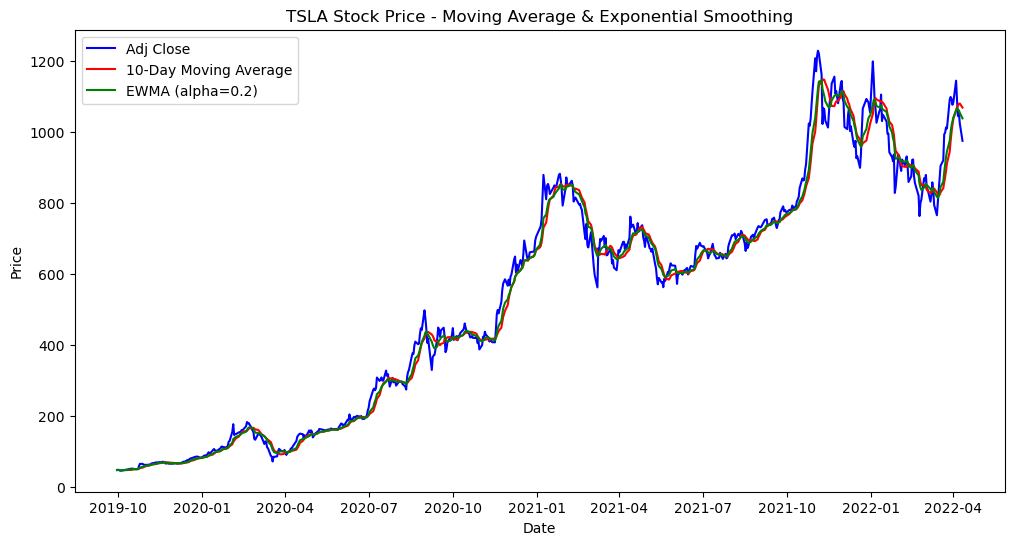

In [14]:
# 1. Moving Average (MA) - 10 days
data['MA_10'] = data['Adj Close'].rolling(window=10).mean()

#2. Exponential Weighted Moving Average (EWMA) - alpha = 0.2
data['EWMA'] = data['Adj Close'].ewm(alpha=0.2, adjust=False).mean()

# Visualization
plt.figure(figsize=(12,6))
plt.plot(data['Adj Close'], label='Adj Close', color='blue')
plt.plot(data['MA_10'], label='10-Day Moving Average', color='red')
plt.plot(data['EWMA'], label='EWMA (alpha=0.2)', color='green')
plt.title("TSLA Stock Price - Moving Average & Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

##Original Series (Adj Close):
Tesla’s stock started at relatively low levels, then experienced strong growth with sharp fluctuations, reaching peaks above 1200. This shows periods of rapid rises followed by corrections.

##Moving Average (10-Day):
Smooths daily noise and highlights the long-term upward trend. It reacts slower than the actual price, making it reliable for identifying general direction without being misled by daily volatility.

##Exponential Weighted Moving Average (EWMA, α=0.2):
Similar to the moving average but responds faster to recent changes. It captures short- and medium-term shifts better, making it useful for traders or short-term analysis.

###Insight: Both methods confirm Tesla’s strong upward trend, but MA is better for long-term investors, while EWMA is more suitable for short-term decisions.

# Build Model(SARIMAX Model)

In [15]:
train_size=int(len(data)*0.8)
train,test=data.iloc[:train_size],data.iloc[train_size:]

y_train=train["Adj Close"]
y_test=test["Adj Close"]

model=SARIMAX(y_train,order=(2,1,2))
model_fit=model.fit()

c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found

In [16]:
forecast=model_fit.forecast(steps=len(y_test))

c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Evaluate the model

In [17]:
#Multi-Step RMSE
mse=mean_squared_error(y_test,forecast)
rmse=np.sqrt(mse)

print("Mean Squared Error (Sarimax):", mse)
print("Root Mean Squared Error (Sarimax):", rmse)

Mean Squared Error (Sarimax): 49571.183188505966
Root Mean Squared Error (Sarimax): 222.645869462036


In [18]:
# One-Step RMSE
history = list(y_train)
one_step_preds_sarima = []

for t in range(len(y_test)):
    model = SARIMAX(history, order=(2,1,2), seasonal_order=(1,1,1,12), trend="t")  
    model_fit = model.fit(disp=False)
    yhat = model_fit.forecast()[0]
    one_step_preds_sarima.append(yhat)
    history.append(y_test.iloc[t])  

rmse_one_sarima = np.sqrt(mean_squared_error(y_test, one_step_preds_sarima))
print("One-step RMSE (SARIMA): ", rmse_one_sarima)

c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmo

One-step RMSE (SARIMA):  42.09774897946141


In [19]:
#Naive RMSE
naive_preds = y_test.shift(1).fillna(y_train.iloc[-1])  

rmse_naive = np.sqrt(mean_squared_error(y_test, naive_preds))
print("Naïve RMSE(Sarimax):", rmse_naive)

Naïve RMSE(Sarimax): 41.576834126806986


In [20]:
print("Mutli-step Root Mean Squared Error (Sarimax):", rmse)
print("One-step RMSE (SARIMA): ", rmse_one_sarima)
print("Naïve RMSE(Sarimax):", rmse_naive)


Mutli-step Root Mean Squared Error (Sarimax): 222.645869462036
One-step RMSE (SARIMA):  42.09774897946141
Naïve RMSE(Sarimax): 41.576834126806986


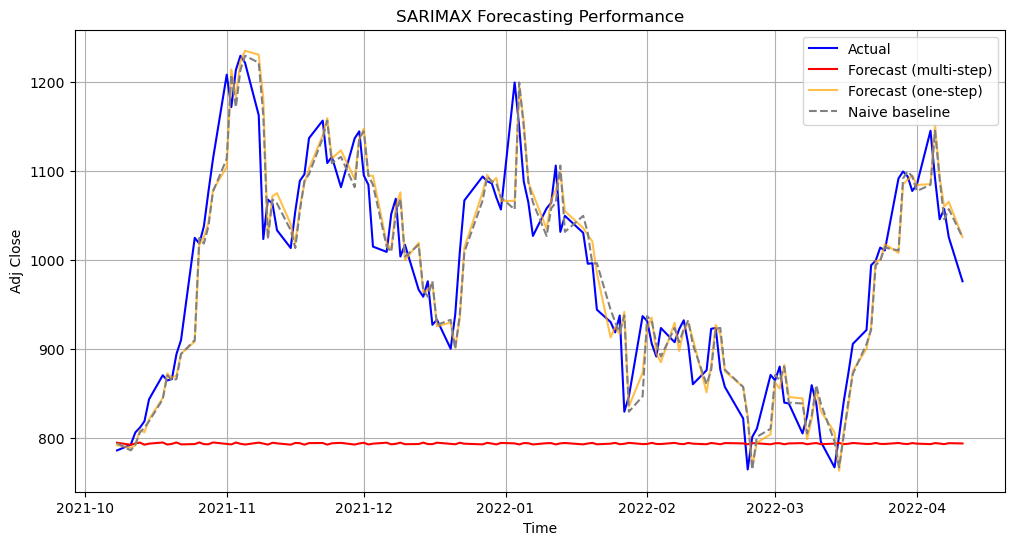

In [21]:
plt.figure(figsize=(12,6))

plt.plot(y_test.index, y_test, label="Actual", color="blue")

plt.plot(y_test.index,forecast, label="Forecast (multi-step)", color="red")

plt.plot(y_test.index, one_step_preds_sarima, label="Forecast (one-step)", color="orange", alpha=0.7)

plt.plot(y_test.index, naive_preds, label="Naive baseline", color="gray", linestyle="--")

plt.title("SARIMAX Forecasting Performance")
plt.xlabel("Time")
plt.ylabel("Adj Close")
plt.legend()
plt.grid(True)
plt.show()


SARIMAX Forecasting Analysis:

Model Fit: The model failed to accurately track market movements, as the predicted values ​​remained relatively constant compared to actual volatility.

Error Measures:

Multi-step RMSE = 222.6 → Relatively large error.

One-step RMSE = 42.1 → Relatively acceptable short-term forecasting.

Naive RMSE = 41.6 → Very close to naive performance, meaning the model did not clearly outperform.

Interpretation:
The results indicate that SARIMAX did not successfully capture the long-term dynamics of stock prices.

Conclusion: Poor long-term performance, not significantly outperforming the Naive baseline.

# Try ARIMA model

In [22]:
y=data["Adj Close"].copy()
y=y.sort_index()
y=y.asfreq("B").ffill()
train_size=int(len(y)*0.8)
y_train,y_test=y.iloc[:train_size],y.iloc[train_size:]


In [23]:
model=ARIMA(y_train,order=(2,1,2),trend="t")
model_fit=model.fit()

In [24]:
forecast_arima=model_fit.forecast(steps=len(y_test))


#  Evaluate the ARIMA model

In [25]:
#Multi-Step RMSE
mse_arima = mean_squared_error(y_test, forecast_arima)
rmse_arima = np.sqrt(mse_arima)

print("Mean Squared Error (MSE):", mse_arima)
print("MUlti-step Root Mean Squared Error (RMSE):", rmse_arima)

Mean Squared Error (MSE): 30454.68775630147
MUlti-step Root Mean Squared Error (RMSE): 174.51271517084786


In [26]:
#One-Step RMSE
history = list(y_train)
one_step_preds = []

for t in range(len(y_test)):
    model = ARIMA(history, order=(2,1,2), trend="t")
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    one_step_preds.append(yhat)
    history.append(y_test.iloc[t]) 

rmse_one_arima = np.sqrt(mean_squared_error(y_test, one_step_preds))
print("One-step RMSE: ", rmse_one_arima)


c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\STAR TOP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: Convergence

One-step RMSE:  41.72914146835977


In [27]:
#Navie RMSE
naive_fc = np.full(shape=len(y_test), fill_value=y_train.iloc[-1])
mse_naive = mean_squared_error(y_test, naive_fc)
rmse_naive_arima = np.sqrt(mse_naive)
print("Naive RMSE:    ", rmse_naive_arima)


Naive RMSE:     231.58695272310845


In [28]:
print("Multi-step RMSE(Arima):", rmse_arima)
print("One-step RMSE(Arima): ", rmse_one_arima)
print("Naive RMSE(Arima):    ", rmse_naive_arima)

Multi-step RMSE(Arima): 174.51271517084786
One-step RMSE(Arima):  41.72914146835977
Naive RMSE(Arima):     231.58695272310845


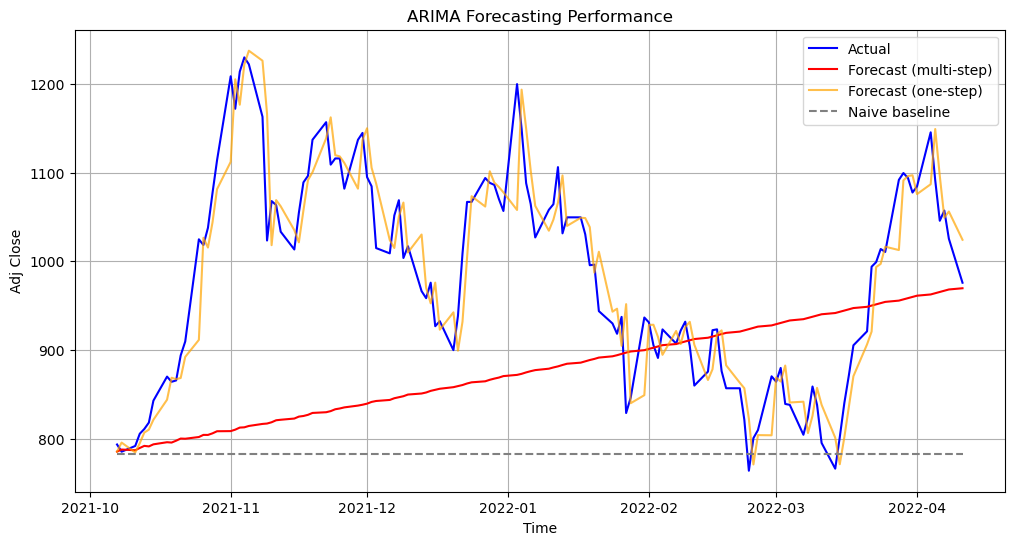

In [29]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual", color="blue")
plt.plot(y_test.index, forecast_arima, label="Forecast (multi-step)", color="red")
plt.plot(y_test.index, one_step_preds, label="Forecast (one-step)", color="orange", alpha=0.7)
plt.plot(y_test.index, naive_fc, label="Naive baseline", color="gray", linestyle="--")
plt.title("ARIMA Forecasting Performance")
plt.xlabel("Time")
plt.ylabel("Adj Close")
plt.legend()
plt.grid(True)
plt.show()


ARIMA Forecasting Analysis:

Model Fit: The model was able to track market movements better than the Naïve baseline, especially in the short term, where its predictions were relatively close to reality.

Error Measures:

Multi-step RMSE = 174.5 → Moderate error, but significantly lower than the Naïve baseline.

One-step RMSE = 41.7 → Very high accuracy in short-term forecasting.

Naïve RMSE = 231.6 → The model clearly outperformed the Naïve baseline.

Interpretation:
The results indicate that ARIMA captures stock time patterns more efficiently than the Naïve baseline, with very strong performance in the short term, but with accumulated error when forecasting over longer time horizons.

Conclusion: Overall performance is good, especially in short-term forecasting, where the model clearly outperforms the Naïve baseline, while improvement is needed when forecasting over longer time horizons.

# Final comparison

In [30]:
print("SARIMAX Model:")
print("Mutli-step Root Mean Squared Error (Sarimax):", rmse)
print("One-step RMSE (SARIMA): ", rmse_one_sarima)
print("Naïve RMSE(Sarimax):", rmse_naive)

print("===============================")

print("ARIMA Model:")
print("Multi-step RMSE(ARima):", rmse_arima)
print("One-step RMSE(ARima): ", rmse_one_arima)
print("Naive RMSE(ARima):    ", rmse_naive_arima)

SARIMAX Model:
Mutli-step Root Mean Squared Error (Sarimax): 222.645869462036
One-step RMSE (SARIMA):  42.09774897946141
Naïve RMSE(Sarimax): 41.576834126806986
ARIMA Model:
Multi-step RMSE(ARima): 174.51271517084786
One-step RMSE(ARima):  41.72914146835977
Naive RMSE(ARima):     231.58695272310845


🔎 Final Analysis of Results

When comparing the performance of time series forecasting models (SARIMAX and ARIMA) using RMSE metrics for both multi-step and one-step forecasting, as well as naive forecasting, we observe the following:

SARIMAX Model

Multi-step RMSE = 222.64 → indicates that the model's accuracy in multi-step forecasting is relatively poor.

One-step RMSE = 42.09 → shows good performance in step-by-step forecasting, indicating that the model handles short-term noise efficiently.

Naive RMSE = 41.58 → performance is very similar to naive forecasting, reflecting that SARIMAX does not add significant value compared to the naive approach when considering one-step forecasting.

ARIMA Model

Multi-step RMSE = 174.51 → is lower than SARIMAX in multi-step forecasting, indicating that ARIMA is better in the medium/long term.

One-step RMSE = 41.72 → is roughly comparable to SARIMAX and Naïve, demonstrating acceptable efficiency in short-term forecasting.

Naïve RMSE = 231.59 → is significantly higher than the model's performance, proving that ARIMA offers clear added value compared to simple forecasting.

Overall Conclusion:

For step-by-step (short-term) forecasting: SARIMAX and ARIMA perform very closely to Naïve, and thus there is no significant difference between the models.

For multi-step (medium/long-term) forecasting: ARIMA significantly outperforms SARIMAX, achieving a significantly lower RMSE.

Added Value: ARIMA clearly offers a significant improvement over the simple approach (Naïve), especially for medium- and long-term forecasting, while SARIMAX did not demonstrate a clear superiority over Naïve.